## 개인 스터디 (1)

- "Hello Flask" 서버에 띠워보기

In [ ]:
#import flask
from flask import Flask

#시작: 모듈명을 __name__으로 넘기고 app이라는 객체 생성
app = Flask(__name__)

#경로 입력 ('/': 시작페이지)
@app.route('/')
#뷰 함수: URL호출 시 호출되는 함수
def hello():
    return 'Hello Flask'

@app.route('/login')
def login():
    return 'Login'

if __name__ == '__main__':
    #flask앱 실행 
    app.run() 


## 개인 스터디 (2)
- 카카오 챗봇과 서버 연동해보기 

> skill server는 local 서버로는 개발 챗봇과 연결해서 테스트할 수 없다. 별도로 서버 호스팅을 해야 한다.

따라서 구름 IDE에서 제공하는 서버 사용.(타 서비스의 경우 서버 생성 시 일정 기간이 필요함)
1. 구름 IDE에서 서버 생성
2. 카카오챗봇 스킬 url에 해당 서버 주소 입력
3. 시나리오에서 스킬데이터 사용


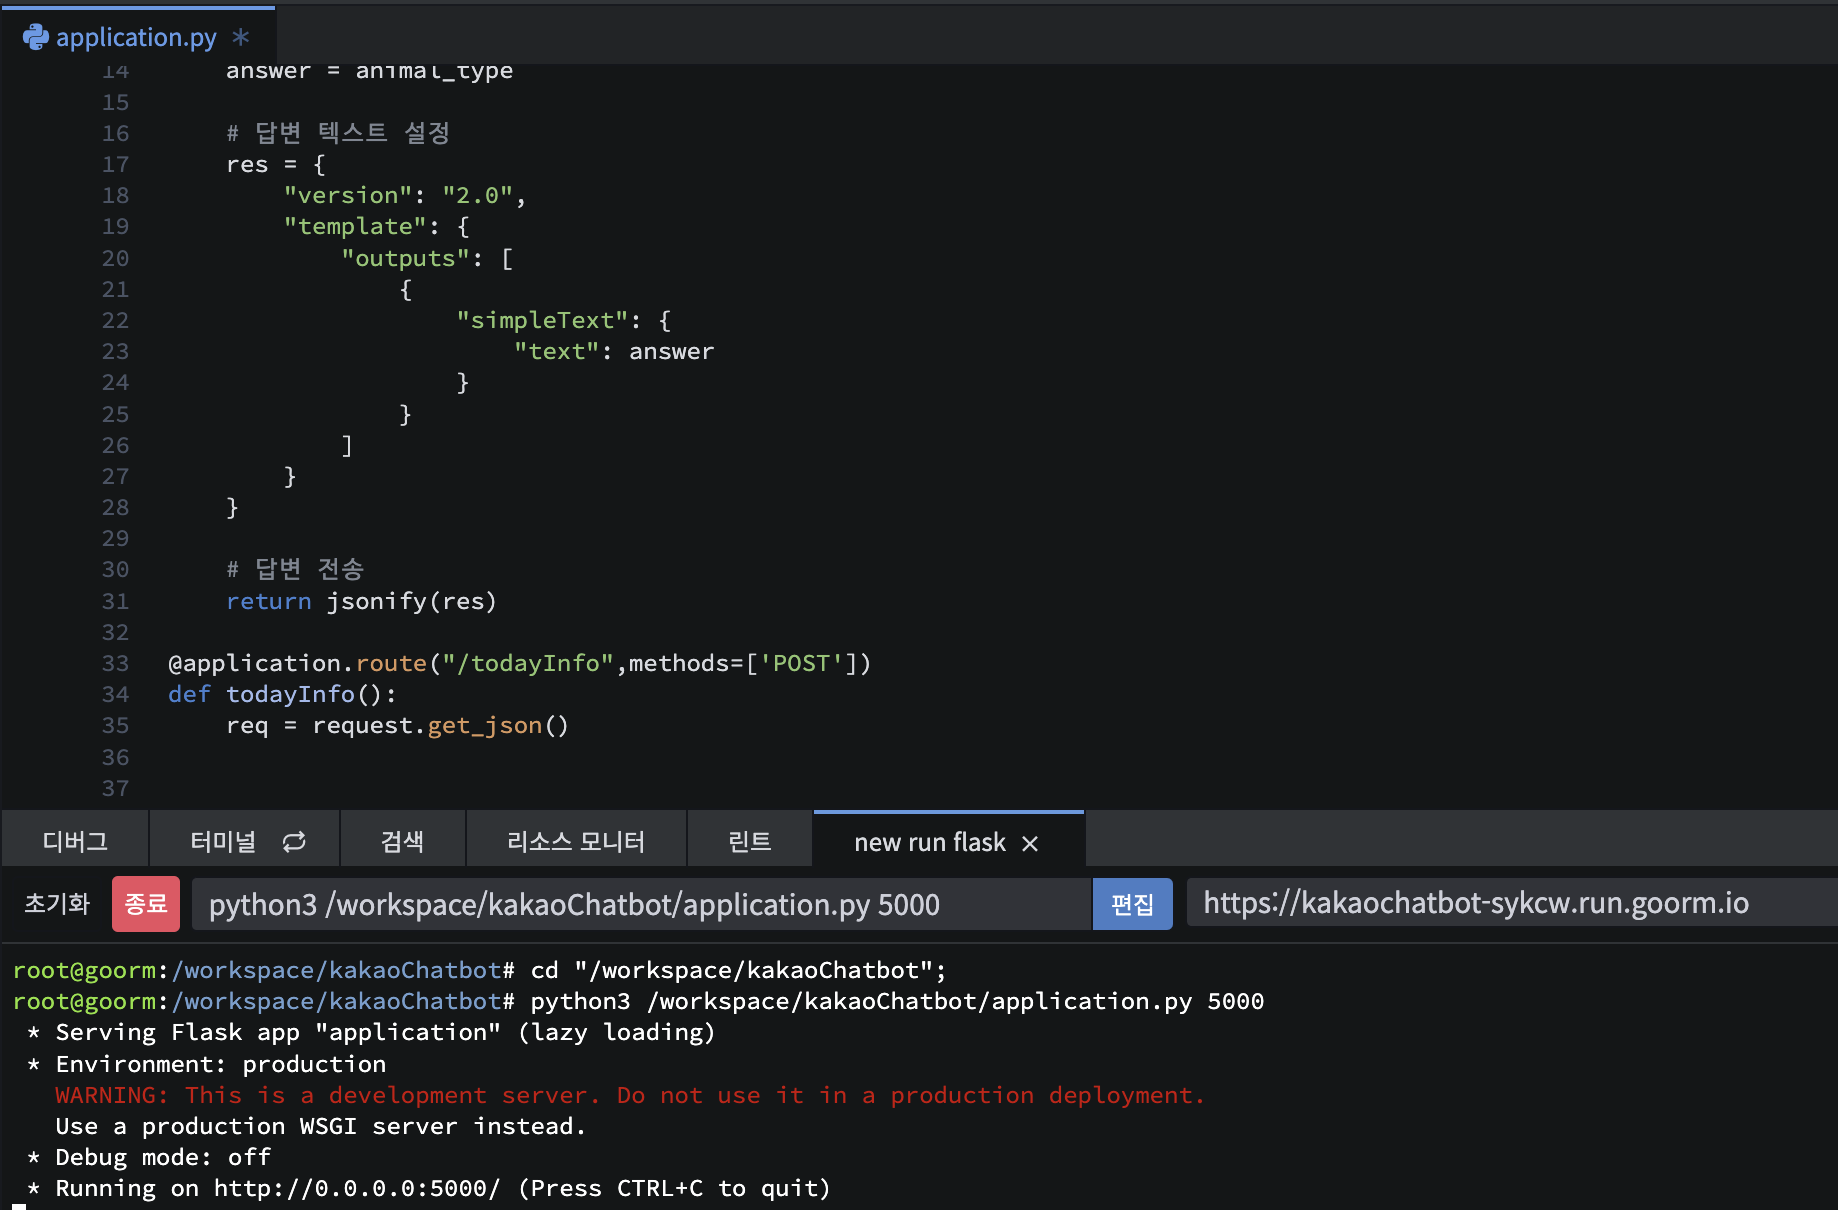

In [ ]:
from flask import Flask, request, jsonify

application = Flask(__name__)


@application.route("/")
def hello():
    return "Hello goorm!" #구름 서버 사용

@application.route("/animal",methods=['POST'])
def animal():
    req = request.get_json()
    animal_type = req["action"]["detailParams"]["Animal_type"]["value"]	# json파일 읽기
    answer = animal_type
    
    # 답변 텍스트 설정
    res = {
        "version": "2.0",
        "template": {
            "outputs": [
                {
                    "simpleText": {
                        "text": answer
                    }
                }
            ]
        }
    }

    # 답변 전송
    return jsonify(res)
    
    

if __name__ == "__main__":
    application.run(host='0.0.0.0', port=5000, threaded=True)


#### 카카오 챗봇에 채팅 입력 시 전달 받은 내용(json)
request로 받아온 json(rec)를 출력한 결과

{'bot': {'id': '62e38ec4faa2f942d4901cc1!',       
'name': '인터페이스 챗봇'},         
'intent': {'id': '63084f76843659496afbae88',        
**'name': 'Animal'** <<시나리오명,         
'extra': {'reason': {'code': 1, 'message': 'OK'}}},        
'action': {'id': '6308571dafbe4b38b58c02e7',        
           **'name': '서버테스트1'** <<스킬명,        
           'params': {'Animal_type': '강아지'},        
           **'detailParams': {'Animal_type'<< 엔티티명: {'groupName': '',        
                                            'origin': '푸들' << 채팅창 입력값(대표 엔트리의 동의어),        
                                            'value': '강아지' << 대표 엔트리}}**,        
                            'clientExtra': {}},        
           'userRequest': {'block': {'id': '63084f76843659496afbae88',        
                                     'name': 'Animal'},        
           'user': {'id':'002197fc68bb42ac942c3f95fb82fcb8ffe6981d3f958f953c6c5ef3b879032743',        
                    'type': 'botUserKey',        
                    'properties': {'botUserKey': '002197fc68bb42ac942c3f95fb82fcb8ffe6981d3f958f953c6c5ef3b879032743',        
                                   'bot_user_key': '002197fc68bb42ac942c3f95fb82fcb8ffe6981d3f958f953c6c5ef3b879032743'}},        
                    'utterance': '푸들\n',        
                    'params': {'surface': 'BuilderBotTest', 'ignoreMe': 'true'},        
                    'lang': 'kr',        
                    'timezone': 'Asia/Seoul'},        
                    'contexts': []}       

#### 그 외 응답 타입별 json 형식
https://i.kakao.com/docs/skill-response-format#userrequest

#### 참고 자료
https://novice-engineers.tistory.com/24?category=939679        
https://givemethesocks.tistory.com/84?category=821263         
https://cupjoo.tistory.com/5

------

## 개인 스터디 (3)

**요약: 서버 배포 이론+과정 요약**         
참고: "**Technology & Finance**/코딩스토리/클라우드서버" 내 자료
https://technfin.tistory.com/category/%EC%BD%94%EB%94%A9%EC%8A%A4%ED%86%A0%EB%A6%AC/%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C%20%EC%84%9C%EB%B2%84

### 1) 무료 클라우드 서버 서비스 3종
:아마존aws, 구글gcp, 오라클 클라우드       
*결론만 말하자면 오라클이 우수
https://technfin.tistory.com/entry/%EB%AC%B4%EB%A3%8C-%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C-%EC%84%9C%EB%B2%84-%EC%84%9C%EB%B9%84%EC%8A%A4-%EB%B9%84%EA%B5%90?category=867921

### 2) 서버 배포 과정 상세(오라클)
#### 1. 서비스 가입
> **주의사항**    
>과거 가입 이력이 있을 경우, 동일 IP에서 가입 시도X
- 계정 생성 시 약 15-30분 소요(문제 없을 경우)

#### 2. 오라클 클라우드 인스턴스 생성
- PuTTygen 프로그램 설치: SSH Key생성 용/ PuTTY 설치 시 함께 설치됨. 
> 1) Create a VM Instance    
> 2) 인스턴스명 정하기    
> 3) **OS종류 및 버전 선택** (초기에 잘 선택해야...)         
> 4) SSH Key 생성 및 등록:     
>>해당 키를 보유한 곳에서만 접속 가능하게 해주는 보안 장치
>> **인스턴스 생성 과정에서만 등록할 수 있기 때문에 이를 그냥 넘어가면 안됨!**  
>
> 5) 부트 볼륨(디스크 용량) 설정(주어진 100GB 내에서 2개의 인스턴스 생성 가능)

#### 3. 오라클 클라우드 고정IP 설정
고정 IP설정 이유:
> 서버에 고정 IP를 설정 : 영구적인 집주소 생성      
> 설정 후에는 서버 접속 IP가 변경되지 않음 = 도메인 연결 가능   

방법:
> 1) Attached VNICs      
> 2) 인스턴스 선택     
> 3) IPv4 Addresses>더보기>Edit 
> 4) 기존 설정 삭제
>> NO Public IP > Update     
>
> 5) 새로운 선택
>> Reserved Public IP      
>> Create New Reserved IP Address     
>> ROOT: Oracle

결과:
해당 IP는 변경되지 않음 + 외부에서 접속시 사용 가능

#### 4. 오라클 클라우드 포트 개방
포트 개방 이유: 
> **포트**:서버에 들어갈 수 있는 문       

따라서 고객이 서비스를 이용할 수 있도록 하기 위해 포트를 개방해야 함.

포트 종류:
> * 80 포트: 일반적. 인터넷 브라우저 접속시 사용. (http://)     
> * 443 포트: 80에서 보안 강화. (https://)    
> * 22 포트: SSH, SFRP 등 서버에 접속해 작업하기 위한 포트. 오라클 사용시 기본적으로 개방된 포트.     
> * 21 포트: 보안 적용 X, FTP포트. 가급적 사용 지양.

포트 개방 방법:
> 1) Subnet > Security Lists     
> 2) Add Ingress Rules     
> 3) Source CIDR: 0.0.0.0/0 : 어디서든 접속 가능      
> 4) IP Protocol : TCP      
> 5) Destination Port Range: 개방하고자 하는 포트 입력(다중 입력 가능)    
> 6) Add Ingress Rules      

#### 5. 서버 접속
PuTTY 사용
> 1) Connection > SSH > Auth > Browse  > PuTTYgen이용해 생성한 Private Key 선택     
> 2) Session > Host Name(접속할 서버의 공인 IP) > 22port > save > Open(접속 시도)
*오라클 클라우드의 기본 계정은 opc      
PuTTYgen으로 SSH Key 생성 시 입력했던 key의 비밀번호 입력

### 다음 과제 제안:
- 기존에 로컬 및 구름 IDE에서만 테스트 해본 내용을 오라클에서 실습해보기 
> 이 경우 os와 부트볼륨 논의 필요
- 개발된 기능들을 바탕으로 추가적으로 필요한 공부 내용 or 구현할 것 정리. 